# Project: TMDB data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Selected to explore the data set of "TMDB Movie Data" This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> The Questions I plan to investigate are:  
>1.What is the popularity trend from year to year?  
>2.Which were the most and least profitable movies?  
>3.In which year we had most no. of profitable movies?   
>4.What is the Average runtime of all the movies?  
>5.Which Genere and Cast have most movies?


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [48]:
df_tmdb=pd.read_csv('tmdb-movies.csv')
df_tmdb.shape

(10866, 21)

<a id= 'describe'></a>
#### Know the Data
>Getting to know the dataBy printing the first few rows of the dataset. And then more information and description of the basic statistics. 

In [49]:
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [50]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [51]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>We can see that more than 50% cases of that have zero values in budget, revenue and runtime.
And these values will effect the staistics of the data. Finding exactly how much of the data is of zero value tels us its a lot of data. I assume the data that is zero is just the value not avilanle or NAN value

In [52]:
df_zero_budget=df_tmdb.query('budget==0')
df_zero_budget.shape

(5696, 21)

In [53]:
df_zero_revenue=df_tmdb.query('revenue==0')
df_zero_revenue.shape

(6016, 21)

<a id='drop'></a>
#### Droping the Columns that are not needed
>The column of:
imdb_id, Original Ttile, 
Homepage, Tagline, 
keywords,overview,
release date, to analyse for the proposed Questions.

In [54]:
df_tmdb.drop(['imdb_id','homepage','tagline','keywords','overview'],1,inplace=True)

In [55]:
sub=['cast', 'director','genres']
df_tmdb.dropna(subset=sub,inplace=True)

In [56]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 16 columns):
id                      10732 non-null int64
popularity              10732 non-null float64
budget                  10732 non-null int64
revenue                 10732 non-null int64
original_title          10732 non-null object
cast                    10732 non-null object
director                10732 non-null object
runtime                 10732 non-null int64
genres                  10732 non-null object
production_companies    9773 non-null object
release_date            10732 non-null object
vote_count              10732 non-null int64
vote_average            10732 non-null float64
release_year            10732 non-null int64
budget_adj              10732 non-null float64
revenue_adj             10732 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [57]:
df_tmdb.drop_duplicates(inplace=True)
df_tmdb.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 16 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              10731 non-null float64
revenue_adj             10731 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [58]:
df_tmdb.drop(['budget_adj','revenue_adj'],1,inplace=True)


In [59]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


>Removing the data where runtime is zero:

In [60]:
df_tmdb.runtime=df_tmdb['runtime'].replace(0,np.NAN)
df_tmdb.isnull().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
runtime                  28
genres                    0
production_companies    959
release_date              0
vote_count                0
vote_average              0
release_year              0
dtype: int64

In [61]:
df_tmdb.dropna(inplace=True)


>Replacing the zero values in budget and revenue column with NAN vlaues.

In [62]:
df_tmdb.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

>Converting the release date to standard date time format

In [63]:
df_tmdb.release_date=pd.to_datetime(df_tmdb['release_date'])

In [64]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 14 columns):
id                      9759 non-null int64
popularity              9759 non-null float64
budget                  9759 non-null int64
revenue                 9759 non-null int64
original_title          9759 non-null object
cast                    9759 non-null object
director                9759 non-null object
runtime                 9759 non-null float64
genres                  9759 non-null object
production_companies    9759 non-null object
release_date            9759 non-null datetime64[ns]
vote_count              9759 non-null int64
vote_average            9759 non-null float64
release_year            9759 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [65]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9759.000000,9759.000000,9.759000e+03,9.759000e+03,9759.000000,9759.000000,9759.000000,9759.000000
mean,62952.180859,0.695266,1.620089e+07,4.429013e+07,103.063736,239.597602,5.964535,2000.862793
std,90448.988464,1.037370,3.222692e+07,1.226599e+08,27.641529,603.361812,0.912967,13.038056
min,5.000000,0.000188,0.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10217.500000,0.232931,0.000000e+00,0.000000e+00,91.000000,18.000000,5.400000,1994.000000
50%,18632.000000,0.420185,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,70146.500000,0.777162,1.965000e+07,3.111596e+07,112.000000,173.500000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Investigative question 1.What is the popularity trend from year to year?

> Firstly finding the median of the popularity for each year and plotting it to get a better picture.

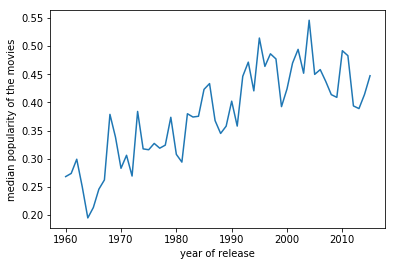

In [66]:
pop_med=df_tmdb.groupby('release_year')['popularity'].median()
plt.plot(pop_med)
plt.xlabel("year of release")
plt.ylabel("median popularity of the movies")
plt.show()

### Investigative Question 2: Which were the most and least profitable movies?

In [67]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 14 columns):
id                      9759 non-null int64
popularity              9759 non-null float64
budget                  9759 non-null int64
revenue                 9759 non-null int64
original_title          9759 non-null object
cast                    9759 non-null object
director                9759 non-null object
runtime                 9759 non-null float64
genres                  9759 non-null object
production_companies    9759 non-null object
release_date            9759 non-null datetime64[ns]
vote_count              9759 non-null int64
vote_average            9759 non-null float64
release_year            9759 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 1.1+ MB


>Profits of a movie is the difference between the revenues earned by the movie and the budget of the movie. We can make the column of the same in the database so that we can hadle id much easily.


In [68]:
df_tmdb.insert(4,'profits',df_tmdb.revenue-df_tmdb.budget)
df_tmdb.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
profits                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [69]:
df_profs=df_tmdb.query('profits>0')

In [70]:
df_profs.head()

,id,popularity,budget,revenue,profits,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [71]:

high_prof=df_tmdb.loc[df_tmdb.profits.idxmax()]
low_prof=df_tmdb.loc[df_tmdb.profits.idxmin()]
pd.concat([high_prof, low_prof], axis=1)
    
                       

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profits,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


### Investigative Question 3  : In which year we had most no.of profitable movies?

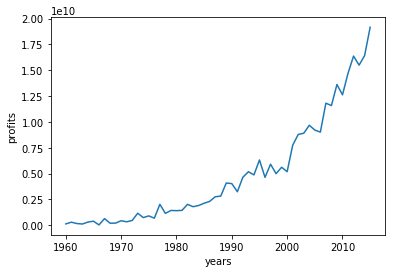

In [72]:
no_profits=df_tmdb.groupby('release_year')['profits'].sum()
plt.plot(no_profits)
plt.xlabel('years')
plt.ylabel('profits')
plt.show();

In [73]:
no_profits.idxmax()


2015

>We can observe that the movies started to make more profits from mid 70s and since the last decade they have increased exponencially. From this data we can say maximum number of profitable movies had been made in 2015.

### Investigative Question 4: What is the Average runtime of all the movies?

In [74]:
run_mean=df_tmdb['runtime'].mean()
run_mean

103.06373603852853

We can plot the it to get a better picture.

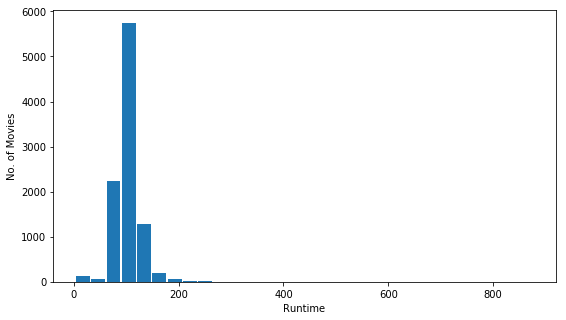

In [75]:
plt.figure(figsize=(9,5))
plt.hist(df_tmdb['runtime'],rwidth=0.9, bins=30)
plt.xlabel("Runtime")
plt.ylabel("No. of Movies")
plt.show();

### Investigative Question 5: Which Genere and Cast have most movies?

In [76]:
def sep(column):
    #will take a column, and separate the string by '|'
    data = pd.Series(df_profs[column].str.cat(sep = '|').split('|'))
    count = data.value_counts()
    return count

genres=sep('genres')
cast=sep('cast')
cast.head()

Robert De Niro       46
Morgan Freeman       36
Tom Hanks            36
Bruce Willis         35
Samuel L. Jackson    34
dtype: int64

> We can plot the Genres in a graph for a better picture


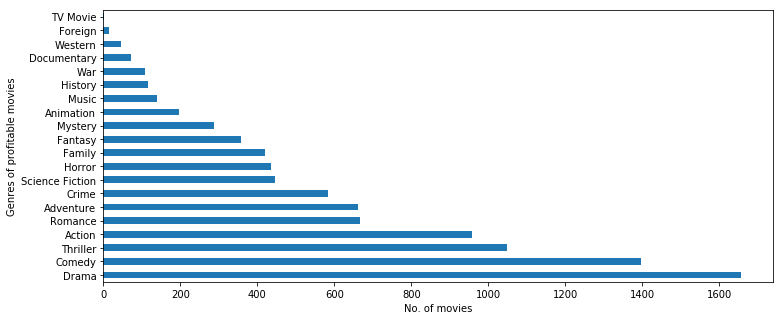

In [30]:
plt.figure(figsize=(12,5))
genres.plot.barh()
plt.xlabel("No. of movies")
plt.ylabel("Genres of profitable movies")
plt.show();

<a id='conclusions'></a>
## Conclusions

>This was an intersting analysis. After analyzing the data set we can see that:  
>**1.** The popularity of movies has been always on a increasing graph. but we can say popularity of movies has gained a momentum since the last decade. This may be because of the boom in internet and out reach of media where people are able to acess more information about the movies.
>**2.** The most profitable movie has been produced in 2015. and the average profits of a profitable movie has been near to 82 millions.
>**3.** The most number of movies had the genres of Drama, Comedy and thriller, and the most casted actors are Robert De Niro, Morgan Freeman and Tom Hanks.  
>**4.** We can say after the analysis that the movies are more likely to be profitable if the runtime is areound 103, gener be one of Drama, Comedy, Thriller, Action, Romance and have a cast that includes any one of Robert De Niro, Morgan Freeman, Tom Hanks, Bruce Willis, Samuel L. Jackson.



In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0